In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
# Data
data16ues = {
    'Process': ['RF Env. Man. Connection', 'E2Node Connection', 'xApp Monitoring', 'Prometheus', 'Vespa Manager', 'Ves Collector', 'Kafka', 'rApp Energy Savings', 'xApp Handover', 'E2Node Handover', 'RF Env. Man. Handover'],
    'Mean': [0.0003, 0.0003, 0.000155, 1.83, 4.332, 1.324148, 0.722, 1.12632, 0.01734537782, 0.018, 0.05],
    'Std Dev': [0.00001, 0.00001, 0.0001674315781, 0.2, 0.3, 0.05, 0.1, 0.39, 0.00026, 0.002, 0.005]
}

data256ues = {
    'Process': [
        'RF Env. Man. Connection', 'E2Node Connection', 'xApp Monitoring', 
        'Prometheus', 'Vespa Manager', 'Ves Collector', 'Kafka', 
        'rApp Energy Savings', 'xApp Handover', 'E2Node Handover', 
        'RF Env. Man. Handover'
    ],
    'Mean': [
        0.008630059981, 0.008630059981, 0.004458864324, 
        52.64336588, 163.3005714, 38.09158888, 20.76967769, 
        61.575, 0.3819826971 , 0.5178035988, 1.43834333
    ],
    'Std Dev': [
        0.000287668666, 0.000287668666, 0.004816481871, 
        5.753373321, 11.30890384, 1.43834333, 2.87668666, 
        17.68047619, 0.02234095238, 0.05753373321, 0.143834333
    ]
}

data1024ues = {
    'Process': [
        'RF Env. Man. Connection', 'E2Node Connection', 'xApp Monitoring', 
        'Prometheus', 'Vespa Manager', 'Ves Collector', 'Kafka', 
        'rApp Energy Savings', 'xApp Handover', 'E2Node Handover', 
        'RF Env. Man. Handover'
    ],
    'Mean': [
        0.03528625192, 0.03528625192, 0.01823123016, 
        215.2461367, 672, 155.7473997, 84.92224628, 
        310.2925, 2.040177904, 2.117175115, 5.881041986
    ],
    'Std Dev': [
        0.001176208397, 0.001176208397, 0.01969344281, 
        23.52416795, 46.53739612, 5.881041986, 11.76208397, 
        73.01, 0.093, 0.2352416795, 0.5881041986
    ]
}

# DataFrame
df16 = pd.DataFrame(data16ues)
df256 = pd.DataFrame(data256ues)
df1024 = pd.DataFrame(data1024ues)

# Calculate percentages
df16['Percentage'] = df16['Mean'] / df16['Mean'].sum() * 100
df256['Percentage'] = df256['Mean'] / df256['Mean'].sum() * 100
df1024['Percentage'] = df1024['Mean'] / df1024['Mean'].sum() * 100

# Adjust data to reflect the process finish and next start for 16 UEs
df16['End'] = df16['Mean'].cumsum()
df16['Start'] = df16['End'].shift(1, fill_value=0)

# Adjust data to reflect the process finish and next start for 256 UEs
df256['End'] = df256['Mean'].cumsum()
df256['Start'] = df256['End'].shift(1, fill_value=0)

# Adjust data to reflect the process finish and next start for 1024 UEs
df1024['End'] = df1024['Mean'].cumsum()
df1024['Start'] = df1024['End'].shift(1, fill_value=0)

/tmp/ipykernel_118840/3376005087.py:142: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['16 UEs', '256 UEs', '1024 UEs'])


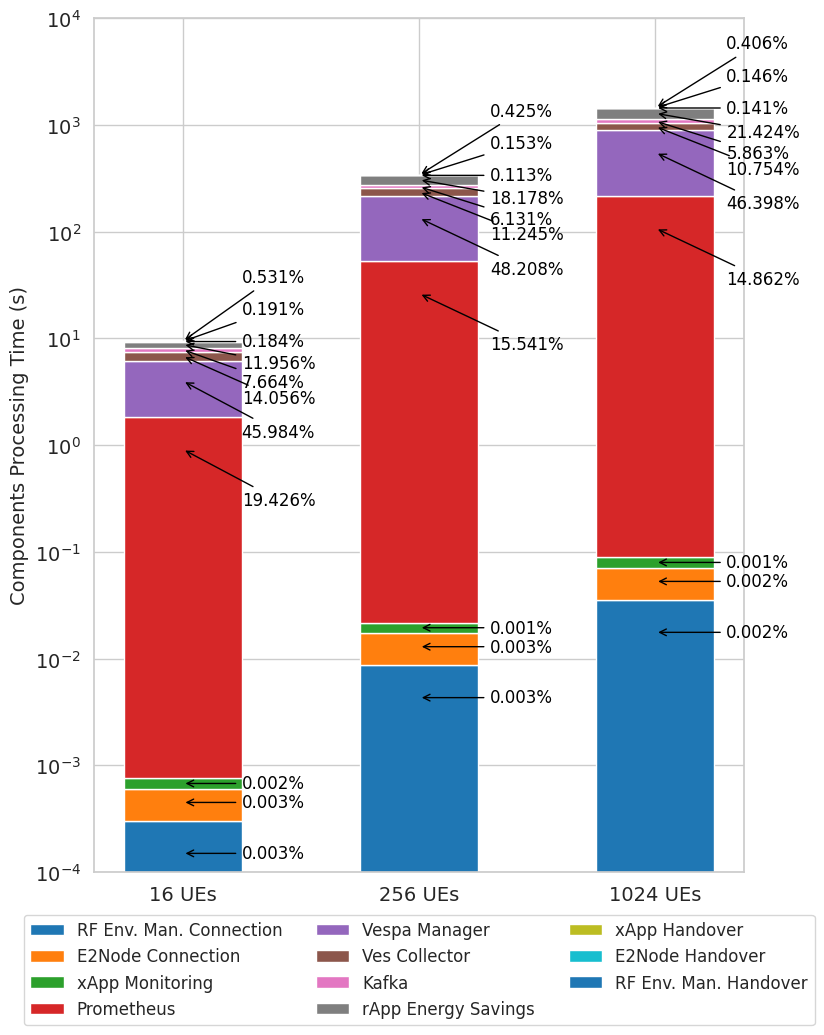

In [9]:
# Set seaborn style
sns.set(style="whitegrid")

# Prepare the figure
fig, ax = plt.subplots(figsize=(12*0.7, 15*0.7))

# Colors for different processes
colors = sns.color_palette("tab10", len(df16))

# Set the width of the bars
bar_width = 0.5  # adjust this value to change the size of the bars

# Plot for 16 UEs
bottom16 = 0
num_rows = len(df16)
for i, row in df16.iterrows():
    ax.bar('16 UEs', row['End'] - row['Start'], bottom=bottom16, color=colors[i], label=row['Process'], width=bar_width)
    bottom16 += row['End'] - row['Start']

# Plot for 256 UEs
bottom256 = 0
num_rows = len(df256)
for i, row in df256.iterrows():
    ax.bar('256 UEs', row['End'] - row['Start'], bottom=bottom256, color=colors[i], width=bar_width)
    bottom256 += row['End'] - row['Start']


# Plot for 1024 UEs
bottom1024 = 0
num_rows = len(df1024)
for i, row in df1024.iterrows():
    ax.bar('1024 UEs', row['End'] - row['Start'], bottom=bottom1024, color=colors[i], width=bar_width)
    bottom1024 += row['End'] - row['Start']
fontsize = 12
# Annotate the percentages manually for 16 UEs
ax.annotate(f'{df16["Percentage"].iloc[0]:.3f}%', xy=(0, (df16["Start"].iloc[0] + df16["End"].iloc[0]) / 2), xytext=(0.25, (df16["Start"].iloc[0] + df16["End"].iloc[0]) / 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df16["Percentage"].iloc[1]:.3f}%', xy=(0, (df16["Start"].iloc[1] + df16["End"].iloc[1]) / 2), xytext=(0.25, (df16["Start"].iloc[1] + df16["End"].iloc[1]) / 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df16["Percentage"].iloc[2]:.3f}%', xy=(0, (df16["Start"].iloc[2] + df16["End"].iloc[2]) / 2), xytext=(0.25, (df16["Start"].iloc[2] + df16["End"].iloc[2]) / 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df16["Percentage"].iloc[3]:.3f}%', xy=(0, (df16["Start"].iloc[3] + df16["End"].iloc[3]) / 2), xytext=(0.25, (df16["Start"].iloc[3] + df16["End"].iloc[3]) / 6),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df16["Percentage"].iloc[4]:.3f}%', xy=(0, (df16["Start"].iloc[4] + df16["End"].iloc[4]) / 2), xytext=(0.25, (df16["Start"].iloc[4] + df16["End"].iloc[4]) / 6),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df16["Percentage"].iloc[5]:.3f}%', xy=(0, (df16["Start"].iloc[5] + df16["End"].iloc[5]) / 2), xytext=(0.25, (df16["Start"].iloc[5] + df16["End"].iloc[5]) / 5),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df16["Percentage"].iloc[6]:.3f}%', xy=(0, (df16["Start"].iloc[6] + df16["End"].iloc[6]) / 2), xytext=(0.25, (df16["Start"].iloc[6] + df16["End"].iloc[6]) / 4),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df16["Percentage"].iloc[7]:.3f}%', xy=(0, (df16["Start"].iloc[7] + df16["End"].iloc[7]) / 2), xytext=(0.25, (df16["Start"].iloc[7] + df16["End"].iloc[7]) / 3),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df16["Percentage"].iloc[8]:.3f}%', xy=(0, (df16["Start"].iloc[8] + df16["End"].iloc[8]) / 2), xytext=(0.25, (df16["Start"].iloc[8] + df16["End"].iloc[8]) / 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df16["Percentage"].iloc[9]:.3f}%', xy=(0, (df16["Start"].iloc[9] + df16["End"].iloc[9]) / 2), xytext=(0.25, (df16["Start"].iloc[9] + df16["End"].iloc[9])),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df16["Percentage"].iloc[10]:.3f}%', xy=(0, (df16["Start"].iloc[10] + df16["End"].iloc[10]) / 2), xytext=(0.25, (df16["Start"].iloc[10] + df16["End"].iloc[10]) * 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')

# Annotate the percentages manually for 256 UEs
ax.annotate(f'{df256["Percentage"].iloc[0]:.3f}%', xy=(1, (df256["Start"].iloc[0] + df256["End"].iloc[0]) / 2), xytext=(1.3, (df256["Start"].iloc[0] + df256["End"].iloc[0]) / 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df256["Percentage"].iloc[1]:.3f}%', xy=(1, (df256["Start"].iloc[1] + df256["End"].iloc[1]) / 2), xytext=(1.3, (df256["Start"].iloc[1] + df256["End"].iloc[1]) / 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df256["Percentage"].iloc[2]:.3f}%', xy=(1, (df256["Start"].iloc[2] + df256["End"].iloc[2]) / 2), xytext=(1.3, (df256["Start"].iloc[2] + df256["End"].iloc[2]) / 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df256["Percentage"].iloc[3]:.3f}%', xy=(1, (df256["Start"].iloc[3] + df256["End"].iloc[3]) / 2), xytext=(1.3, (df256["Start"].iloc[3] + df256["End"].iloc[3]) / 6),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df256["Percentage"].iloc[4]:.3f}%', xy=(1, (df256["Start"].iloc[4] + df256["End"].iloc[4]) / 2), xytext=(1.3, (df256["Start"].iloc[4] + df256["End"].iloc[4]) / 6),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df256["Percentage"].iloc[5]:.3f}%', xy=(1, (df256["Start"].iloc[5] + df256["End"].iloc[5]) / 2), xytext=(1.3, (df256["Start"].iloc[5] + df256["End"].iloc[5]) / 5),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df256["Percentage"].iloc[6]:.3f}%', xy=(1, (df256["Start"].iloc[6] + df256["End"].iloc[6]) / 2), xytext=(1.3, (df256["Start"].iloc[6] + df256["End"].iloc[6]) / 4),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df256["Percentage"].iloc[7]:.3f}%', xy=(1, (df256["Start"].iloc[7] + df256["End"].iloc[7]) / 2), xytext=(1.3, (df256["Start"].iloc[7] + df256["End"].iloc[7]) / 3),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df256["Percentage"].iloc[8]:.3f}%', xy=(1, (df256["Start"].iloc[8] + df256["End"].iloc[8]) / 2), xytext=(1.3, (df256["Start"].iloc[8] + df256["End"].iloc[8]) / 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df256["Percentage"].iloc[9]:.3f}%', xy=(1, (df256["Start"].iloc[9] + df256["End"].iloc[9]) / 2), xytext=(1.3, (df256["Start"].iloc[9] + df256["End"].iloc[9])),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df256["Percentage"].iloc[10]:.3f}%', xy=(1, (df256["Start"].iloc[10] + df256["End"].iloc[10]) / 2), xytext=(1.3, (df256["Start"].iloc[10] + df256["End"].iloc[10]) * 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')

# Annotate the percentages manually for 1024 UEs
ax.annotate(f'{df1024["Percentage"].iloc[0]:.3f}%', xy=(2, (df1024["Start"].iloc[0] + df1024["End"].iloc[0]) / 2), xytext=(2.3, (df1024["Start"].iloc[0] + df1024["End"].iloc[0]) / 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df1024["Percentage"].iloc[1]:.3f}%', xy=(2, (df1024["Start"].iloc[1] + df1024["End"].iloc[1]) / 2), xytext=(2.3, (df1024["Start"].iloc[1] + df1024["End"].iloc[1]) / 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df1024["Percentage"].iloc[2]:.3f}%', xy=(2, (df1024["Start"].iloc[2] + df1024["End"].iloc[2]) / 2), xytext=(2.3, (df1024["Start"].iloc[2] + df1024["End"].iloc[2]) / 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df1024["Percentage"].iloc[3]:.3f}%', xy=(2, (df1024["Start"].iloc[3] + df1024["End"].iloc[3]) / 2), xytext=(2.3, (df1024["Start"].iloc[3] + df1024["End"].iloc[3]) / 6),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df1024["Percentage"].iloc[4]:.3f}%', xy=(2, (df1024["Start"].iloc[4] + df1024["End"].iloc[4]) / 2), xytext=(2.3, (df1024["Start"].iloc[4] + df1024["End"].iloc[4]) / 6),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df1024["Percentage"].iloc[5]:.3f}%', xy=(2, (df1024["Start"].iloc[5] + df1024["End"].iloc[5]) / 2), xytext=(2.3, (df1024["Start"].iloc[5] + df1024["End"].iloc[5]) / 5),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df1024["Percentage"].iloc[6]:.3f}%', xy=(2, (df1024["Start"].iloc[6] + df1024["End"].iloc[6]) / 2), xytext=(2.3, (df1024["Start"].iloc[6] + df1024["End"].iloc[6]) / 4),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df1024["Percentage"].iloc[7]:.3f}%', xy=(2, (df1024["Start"].iloc[7] + df1024["End"].iloc[7]) / 2), xytext=(2.3, (df1024["Start"].iloc[7] + df1024["End"].iloc[7]) / 3),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df1024["Percentage"].iloc[8]:.3f}%', xy=(2, (df1024["Start"].iloc[8] + df1024["End"].iloc[8]) / 2), xytext=(2.3, (df1024["Start"].iloc[8] + df1024["End"].iloc[8]) / 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df1024["Percentage"].iloc[9]:.3f}%', xy=(2, (df1024["Start"].iloc[9] + df1024["End"].iloc[9]) / 2), xytext=(2.3, (df1024["Start"].iloc[9] + df1024["End"].iloc[9])),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')
ax.annotate(f'{df1024["Percentage"].iloc[10]:.3f}%', xy=(2, (df1024["Start"].iloc[10] + df1024["End"].iloc[10]) / 2), xytext=(2.3, (df1024["Start"].iloc[10] + df1024["End"].iloc[10]) * 2),
            arrowprops=dict(arrowstyle="->", color='black'),
            ha='left', va='center', fontsize=fontsize, color='black')



ax.set_xticklabels(['16 UEs', '256 UEs', '1024 UEs'])

ax.set_ylabel('Components Processing Time (s)', fontsize=fontsize+2)
#ax.set_title('Processing Time for 16, 256, and 1024 UEs')
ax.set_yscale('log')
ax.set_yticks([10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4])
ax.tick_params(axis='both', which='major', labelsize=fontsize + 2)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=fontsize)

# Customize the plot
plt.tight_layout()

# Save the plots
plt.savefig('out/detailed-times-stacked.pdf', bbox_inches='tight')
plt.savefig('out/detailed-times-stacked.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()